# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Josiah Randleman

### Github Profile Link: https://github.com/jrandl

### Github Repo Link: https://github.com/jrandl/web-scraping

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [86]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- ----------------
annotated-types           0.7.0
apturl                    0.5.2
asttokens                 2.4.1
attrs                     24.2.0
bcrypt                    3.2.0
beautifulsoup4            4.12.3
bleach                    6.2.0
blinker                   1.4
blis                      1.0.1
Brlapi                    0.8.3
catalogue                 2.0.10
certifi                   2020.6.20
chardet                   4.0.0
click                     8.0.3
cloudpathlib              0.20.0
colorama                  0.4.4
comm                      0.2.2
command-not-found         0.3
confection                0.1.5
contourpy                 1.3.1
cryptography              3.4.8
cupshelpers               1.0
cycler                    0.12.1
cymem                     2.0.8
dbus-python               1.2.18
debugpy                   1.8.8
decorator                 5.1.1
defer                     1.0.6
defusedxml             

### Question 1:

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [87]:
import requests

from bs4 import BeautifulSoup

import pickle



def extract_and_save_html(url, filename="webpage.pkl"):

    response = requests.get(url)

    response.raise_for_status()  # Raise an error if request fails

    soup = BeautifulSoup(response.content, 'html.parser')

    html_content = str(soup)



    with open(filename, 'wb') as f:

        pickle.dump(html_content, f)



# Example usage:

target_url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

extract_and_save_html(target_url) 


### Question 2:

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [88]:
import pickle
from bs4 import BeautifulSoup

file_name = 'webpage.pkl'

# Load the HTML content from the pickle file
with open(file_name, 'rb') as webpage:
    data = pickle.load(webpage)

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(data, 'html.parser')

# Extract the article content from the specific div
article = soup.find('div', class_='entry-content')

# Extract the plain text from the article
article_text = article.get_text(separator="\n").strip() if article else "Article content not found."

# Print the article content
print(article_text)


When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.


Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!




Laser Headlights?!


BWM’s prototype laser headlight assemblies undergoing testing.


The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside of a very specific spot quite some distance away. Thankfully for our eyes, laser headlights don’t work i

### Question 3:

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [89]:
import spacy
from collections import Counter

# Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Input text
text = article_text

# Process the text
doc = nlp(text)

# Filter out stop words, punctuation, and whitespace, and convert tokens to lowercase
words = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Count the frequency of each filtered word
word_freq = Counter(words)

# Get the 5 most frequent words
top_5_words = word_freq.most_common(5)

# Print the results with appropriate labels
print("Top 5 most frequent tokens:")
for word, freq in top_5_words:
    print(f"Token: '{word}', Frequency: {freq}")


Top 5 most frequent tokens:
Token: 'laser', Frequency: 30
Token: 'headlights', Frequency: 17
Token: 'technology', Frequency: 10
Token: 'headlight', Frequency: 10
Token: 'led', Frequency: 10


### Question 4:

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [90]:
import spacy
from collections import Counter

# Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Input text
text = article_text

# Process the text
doc = nlp(text)

# Filter out stop words, punctuation, and whitespace, and get lemmas in lowercase
lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Count the frequency of each lemma
lemma_freq = Counter(lemmas)

# Get the 5 most frequent lemmas
top_5_lemmas = lemma_freq.most_common(5)

# Print the results with appropriate labels
print("Top 5 most frequent lemmas:")
for lemma, freq in top_5_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")


Top 5 most frequent lemmas:
Lemma: 'laser', Frequency: 35
Lemma: 'headlight', Frequency: 26
Lemma: 'beam', Frequency: 12
Lemma: 'technology', Frequency: 10
Lemma: 'led', Frequency: 10


### Question 5:

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [91]:
import spacy
from collections import Counter

# Define the function to score by tokens
def score_sentence_by_token(sentence, interesting_tokens):
    """
    Scores a sentence based on the frequency of interesting tokens.
    """
    # Process the sentence using spaCy
    doc = nlp(sentence)
    # Convert tokens to lowercase and filter out stopwords, punctuation, and whitespace
    tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    # Count how many interesting tokens are in the sentence
    match_count = sum(1 for token in tokens if token in interesting_tokens)
    # Return the score as the proportion of interesting tokens
    return match_count / len(tokens) if tokens else 0

# Define the function to score by lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Scores a sentence based on the frequency of interesting lemmas.
    """
    # Process the sentence using spaCy
    doc = nlp(sentence)
    # Convert lemmas to lowercase and filter out stopwords, punctuation, and whitespace
    lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    # Count how many interesting lemmas are in the sentence
    match_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    # Return the score as the proportion of interesting lemmas
    return match_count / len(lemmas) if lemmas else 0

# Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Input text
text = "When we think about the onward march of automotive technology, headlights aren't usually the first thing that come to mind."
doc = nlp(text)

# Define the tokens and lemmas to test
interesting_tokens = ["laser", "headlights", "technology", "headlight", "led"] # Top 5 most frequent tokens from question 3
interesting_lemmas = ["laser", "headlight", "beam", "technology", "led"] # Top 5 most frequent lemmas from question 4

# Split the text into sentences
sentences = [sent.text.strip() for sent in doc.sents]

# Test the first sentence
first_sentence = sentences[0]

# Calculate scores
token_score = score_sentence_by_token(first_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

# Print results
print(f"First sentence: '{first_sentence}'")
print(f"Token score: {token_score}")
print(f"Lemma score: {lemma_score}")

First sentence: 'When we think about the onward march of automotive technology, headlights aren't usually the first thing that come to mind.'
Token score: 0.2
Lemma score: 0.2


### Question 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

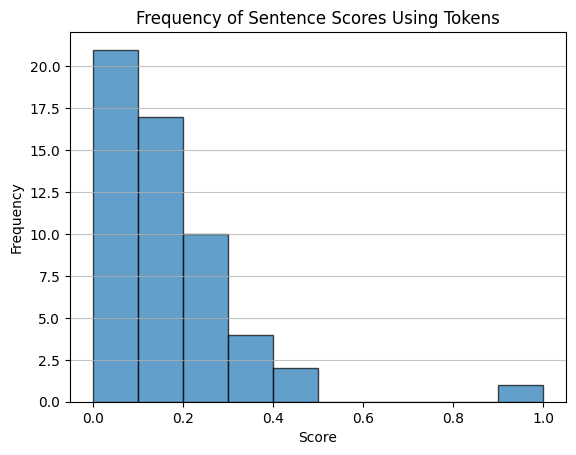

In [92]:
import spacy
import matplotlib.pyplot as plt

# Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Input text
text = article_text

# Process the text into sentences
doc = nlp(text)
sentences = [sent.text.strip() for sent in doc.sents]

# Calculate scores for each sentence
sentence_scores = [score_sentence_by_token(sentence, interesting_tokens) for sentence in sentences]

# Plot the histogram
plt.hist(sentence_scores, bins=10, edgecolor='black', alpha=0.7)  
plt.title("Frequency of Sentence Scores Using Tokens")  
plt.xlabel("Score")  
plt.ylabel("Frequency")  
plt.grid(axis='y', alpha=0.75)  
plt.show()


#----------------------------------------------------------------------------------------#
# Question: From your histogram, what seems to be the most common range of scores?
# Answer: Looking at my histogram, the most common range of scores is between 0.0 and 0.1.
#----------------------------------------------------------------------------------------#


### Question 7:

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

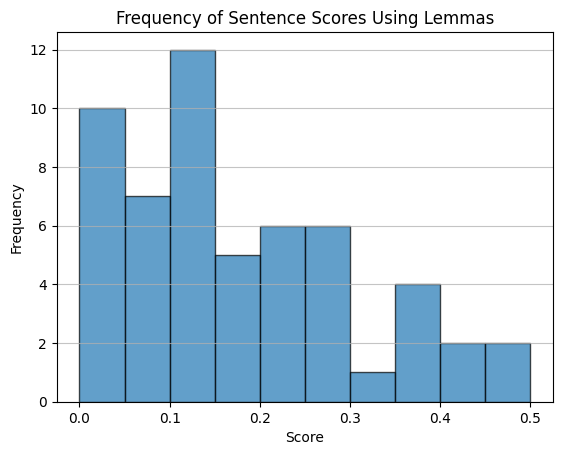

In [93]:
import spacy
import matplotlib.pyplot as plt

# Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Input text
text = article_text 

# Process the text into sentences
doc = nlp(text)
sentences = [sent.text.strip() for sent in doc.sents]

# Calculate scores for each sentence
sentence_scores = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in sentences]

# Plot the histogram
plt.hist(sentence_scores, bins=10, edgecolor='black', alpha=0.7)  
plt.title("Frequency of Sentence Scores Using Lemmas")  
plt.xlabel("Score")  
plt.ylabel("Frequency")  
plt.grid(axis='y', alpha=0.75)  
plt.show()


#----------------------------------------------------------------------------------------#
# Question: From your histogram, what seems to be the most common range of scores?
# Answer: Looking at my histogram, the most common range of scores is between 0.1 and 0.2.
#----------------------------------------------------------------------------------------#

### Question 8:

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).
---

## Tokens and Lemmas Omitted if We Only Consider Nouns:

Looking at the **Top 5 Tokens** from **Question 3**:
1. **Token: 'laser', Frequency: 30, POS: NOUN**
   - This remains, as it is classified as a noun.
2. **Token: 'headlights', Frequency: 17, POS: NOUN**
   - This remains, as it is classified as a noun.
3. **Token: 'technology', Frequency: 10, POS: NOUN**
   - This remains, as it is classified as a noun.
4. **Token: 'headlight', Frequency: 10, POS: NOUN**
   - This remains, as it is classified as a noun.
5. **Token: 'led', Frequency: 10, POS: VERB**
   - This is ommitted, as it is classified as a verb.

**Final List for Tokens (Nouns Only):**
- `laser, headlights, technology, headlight`

---

Looking at the **Top 5 Lemmas** from **Question 4**:
1. **Lemma: 'laser', Frequency: 35, Part of Speech: NOUN**
   - This remains, as it is classified as a noun.
2. **Lemma: 'headlight', Frequency: 26, Part of Speech: NOUN**
   - This remains, as it is classified as a noun.
3. **Lemma: 'beam', Frequency: 12, Part of Speech: NOUN**
   - This remains, as it is classified as a noun.
4. **Lemma: 'technology', Frequency: 10, Part of Speech: NOUN**
   - This remains, as it is classified as a noun.
5. **Lemma: 'led', Frequency: 10, Part of Speech: NOUN**
   - This remains, as it is classified as a noun.

**Final List for Lemmas (Nouns Only):**
- `laser, headlight, beam, technology, led`

---

### How to Change the Code to Only Consider Nouns:

We can modify the code to filter out tokens and lemmas that are not nouns by adding a condition to check the `token.pos_`. This can be done using an `if` statement to allow only **nouns** (`NOUN`) and **proper nouns** (`PROPN`).

#### Updated Code for Tokens:
```python
# Filter out stop words, punctuation, whitespace, and include only nouns
tokens_nouns = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space and token.pos_ in ["NOUN", "PROPN"]
]


# Filter out stop words, punctuation, whitespace, and include only nouns
lemmas_nouns = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space and token.pos_ in ["NOUN", "PROPN"]
]




---
### Examples

In [97]:
import spacy
from collections import Counter

# Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Input text
text = article_text

# Process the text
doc = nlp(text)

# Filter out stop words, punctuation, and whitespace, and convert tokens to lowercase
words = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Count the frequency of each filtered word
word_freq = Counter(words)

# Get the 5 most frequent words
top_5_words = word_freq.most_common(5)

# Print the results with POS tagging
print("Top 5 most frequent tokens and their POS tags:")
for word, freq in top_5_words:
    # Find the token in the original doc to get its POS tag
    for token in doc:
        if token.text.lower() == word:
            pos = token.pos_  # Get the part of speech
            print(f"Token: '{word}', Frequency: {freq}, POS: {pos}")
            break



Top 5 most frequent tokens and their POS tags:
Token: 'laser', Frequency: 30, POS: PROPN
Token: 'headlights', Frequency: 17, POS: NOUN
Token: 'technology', Frequency: 10, POS: NOUN
Token: 'headlight', Frequency: 10, POS: NOUN
Token: 'led', Frequency: 10, POS: VERB


In [96]:
import spacy
from collections import Counter

# Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Input text
text = article_text

# Process the text
doc = nlp(text)

# Filter out stop words, punctuation, and whitespace, and get lemmas in lowercase
lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Count the frequency of each lemma
lemma_freq = Counter(lemmas)

# Get the 5 most frequent lemmas
top_5_lemmas = lemma_freq.most_common(5)

# Print the results with appropriate labels
print("Top 5 most frequent lemmas and their parts of speech:")
for lemma, freq in top_5_lemmas:
    # Find the first occurrence of the lemma in the original doc to get its part of speech
    token = next((token for token in doc if token.lemma_.lower() == lemma), None)
    pos = token.pos_ if token else "Unknown"
    print(f"Lemma: '{lemma}', Frequency: {freq}, Part of Speech: {pos}")


Top 5 most frequent lemmas and their parts of speech:
Lemma: 'laser', Frequency: 35, Part of Speech: NOUN
Lemma: 'headlight', Frequency: 26, Part of Speech: NOUN
Lemma: 'beam', Frequency: 12, Part of Speech: NOUN
Lemma: 'technology', Frequency: 10, Part of Speech: NOUN
Lemma: 'led', Frequency: 10, Part of Speech: NOUN
